LOGISTIC REGRESSION - BINARY CLASSIFICATION

Null values in dataset:
 age                 0
bought_insurance    0
dtype: int64


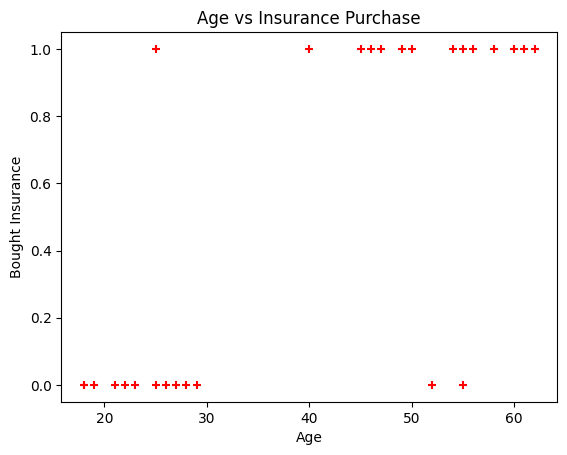

Model Accuracy: 1.0
Prediction Probabilities:
 [[0.06470655 0.93529345]
 [0.10327333 0.89672667]
 [0.92775258 0.07224742]]
Prediction for age 60: 1
Coefficient (m): [[0.1274065]]
Intercept (b): [-4.97339194]
Sigmoid prediction for age 35: 0.37


'0.37 is less than 0.5 which means a person with age 35 will not buy the insurance'

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

# Load dataset
df = pd.read_csv("insurance_data.csv")

# Check for null values
print("Null values in dataset:\n", df.isnull().sum())

# Visualize data
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.title("Age vs Insurance Purchase")
plt.show()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9, random_state=10)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_predicted = model.predict(X_test)

# Model accuracy
print("Model Accuracy:", model.score(X_test, y_test))

# Probability predictions
print("Prediction Probabilities:\n", model.predict_proba(X_test))

# Predict for a specific age
age_input = 60
y_predicted = model.predict(pd.DataFrame([[age_input]], columns=['age']))
print(f"Prediction for age {age_input}: {y_predicted[0]}")

# Display model coefficients
print("Coefficient (m):", model.coef_)
print("Intercept (b):", model.intercept_)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Prediction function using manual computation
def prediction_function(age):
    z = model.coef_[0][0] * age + model.intercept_[0]  # Use actual model coefficients
    y = sigmoid(z)
    return y

# Example prediction with manual computation
age = 35
print(f"Sigmoid prediction for age {age}: {prediction_function(age):.2f}")

"""0.37 is less than 0.5 which means a person with age 35 will not buy the insurance"""


LOGISTIC REGRESSION - MULTI CLASS

Null values in dataset:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


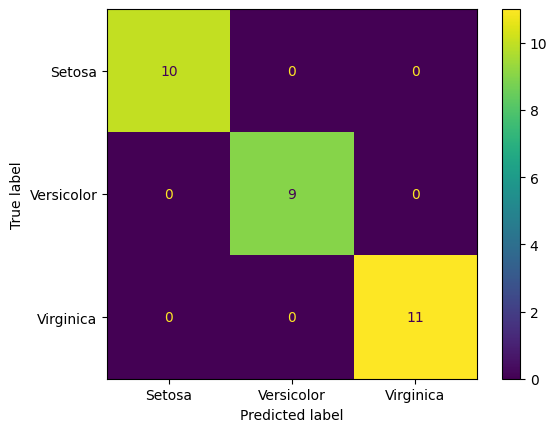

In [5]:
# -*- coding: utf-8 -*-
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Iris dataset
df = pd.read_csv("iris.csv")

# Check for null values
print("Null values in dataset:\n", df.isnull().sum())

# Display first few rows
df.head()

# Prepare features and target
X = df.drop('species', axis='columns')  # Features (sepal length, sepal width, petal length, petal width)
y = df.species  # Target labels (Setosa, Versicolor, Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
# No need to specify 'multi_class' as 'multinomial' is the default now
model = LogisticRegression(solver='lbfgs', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()


HR_comma_sep.csv

First 5 rows of the dataset:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salar

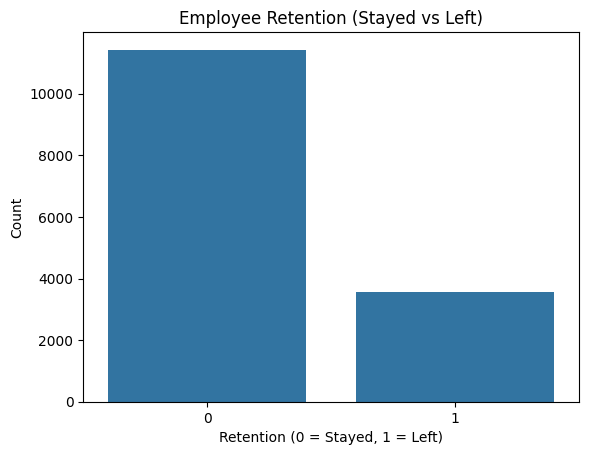

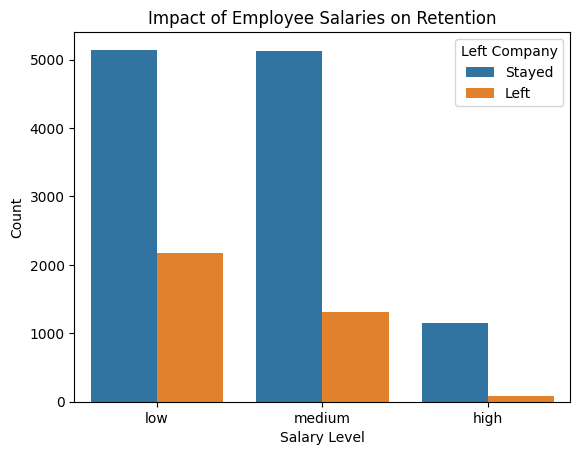

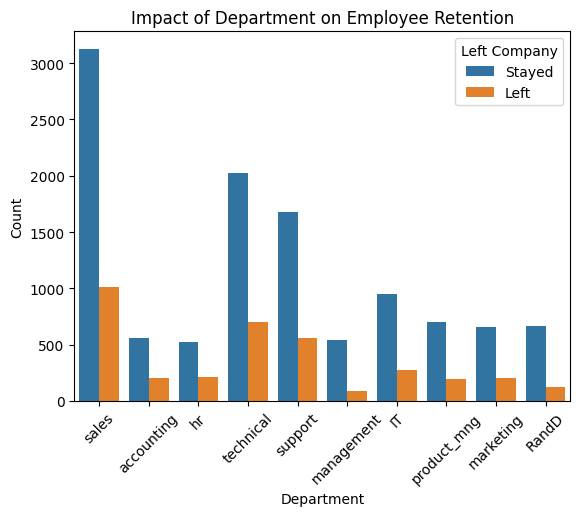

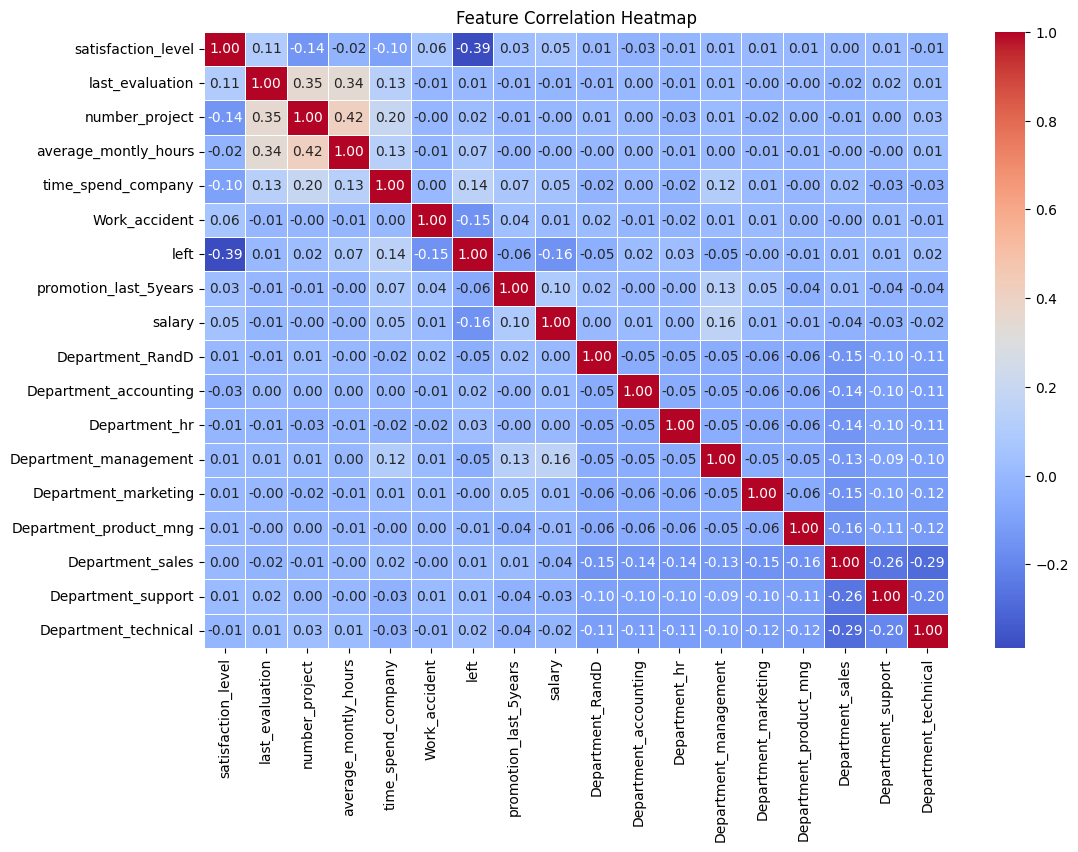


Model Accuracy: 78.87%


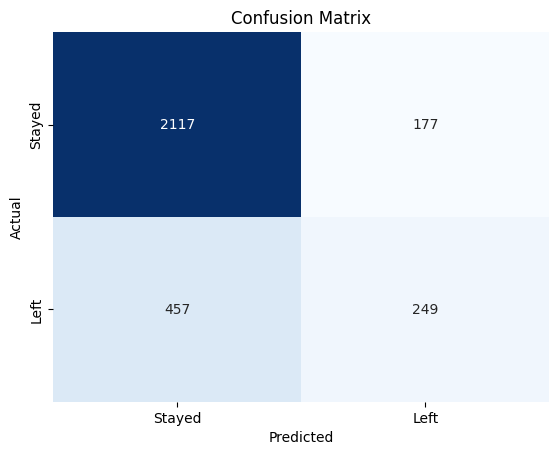


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000


Regression Coefficients: [[-1.0387794   0.11252778 -0.37868909  0.24815627  0.38651401 -0.53260561
  -0.20879142 -0.43264453 -0.11723045  0.03199253  0.09470076 -0.08122249
   0.04215146  0.01756773  0.05166563  0.06175803  0.08939473]]
Intercept: [-1.58279448]


In [16]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')

# 1. Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:\n", df.head())

# Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# Describe the dataset
print("\nSummary statistics:\n", df.describe())

# Countplot of employee retention (stayed vs left)
sns.countplot(x='left', data=df)
plt.title("Employee Retention (Stayed vs Left)")
plt.xlabel("Retention (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

# 2. Impact of Employee Salaries on Retention
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])
plt.title("Impact of Employee Salaries on Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

# 3. Correlation between Department and Employee Retention
sns.countplot(x='Department', hue='left', data=df)
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

# 4. Data Preprocessing

# Convert 'salary' column to numeric (ordinal encoding: low=0, medium=1, high=2)
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# One-hot encode the 'Department' column
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)

# Compute correlation matrix and plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Build Logistic Regression Model

# Select relevant features based on correlation analysis
selected_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company', 'Work_accident',
                     'promotion_last_5years', 'salary']

# Add department one-hot encoded features
department_features = [col for col in df_encoded.columns if col.startswith('Department_')]
selected_features += department_features

# Define feature matrix (X) and target variable (y)
X = df_encoded[selected_features]
y = df_encoded['left']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with higher max_iter to prevent convergence issues
logreg_model = LogisticRegression(max_iter=500)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# 6. Model Evaluation

# Predict on test set
y_pred = logreg_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display regression coefficients
print("\nRegression Coefficients:", logreg_model.coef_)
print("Intercept:", logreg_model.intercept_)


ZOO-CLASS-TYPE

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 0.95


<Figure size 800x600 with 0 Axes>

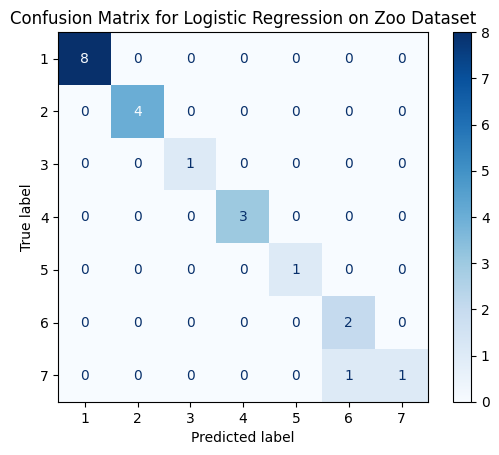

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load datasets
zoo_data_path = "zoo-data.csv"
zoo_class_type_path = "zoo-class-type.csv"

zoo_data = pd.read_csv(zoo_data_path)
zoo_class_type = pd.read_csv(zoo_class_type_path)

# Drop 'animal_name' as it is not useful for classification
zoo_data = zoo_data.drop(columns=['animal_name'])

# Features and target variable
X = zoo_data.drop(columns=['class_type'])
y = zoo_data['class_type']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression on Zoo Dataset")
plt.show()


#End to End

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     

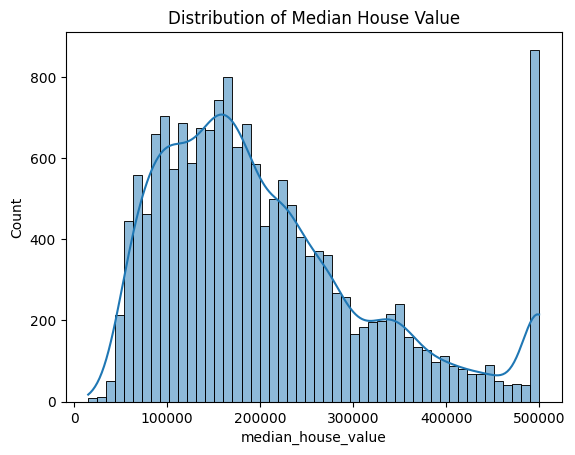

KeyboardInterrupt: 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load the data
train_data_path = "sample_data/california_housing_train.csv"
test_data_path = "sample_data/california_housing_test.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Step 3: Explore the data
print(train_data.info())
print(train_data.describe())

# Visualize the data
sns.histplot(train_data["median_house_value"], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

# Step 4: Prepare the data
X = train_data.drop("median_house_value", axis=1)
y = train_data["median_house_value"]

# Split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 5: Select and train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Fine-tune the model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Step 7: Evaluate the model
y_pred = best_model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 8: Deployment strategy (Hypothetical)
# - Convert model to a serialized format (pickle/joblib)
# - Deploy as an API endpoint using Flask or FastAPI
# - Monitor model performance using MLOps tools like MLflow or Prometheus
